1. Загрузить выборку с сайта Kaggle.com.
2. Провести анализ полученной выборки на наличие пропущенных данных.
3. Заполнить пропуски в данных
4. Выявить выбросы по показателям и удалить их

In [2]:
# импорт пакетов
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [5]:
df=pd.read_csv('/content/gt_2011.csv')

In [6]:
# выведем размер и тип данных
print(df.shape)
print(df.dtypes)

(7411, 11)
AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object


In [7]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['AT' 'AP' 'AH' 'AFDP' 'GTEP' 'TIT' 'TAT' 'TEY' 'CDP' 'CO' 'NOX']


In [8]:
 # отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

[]


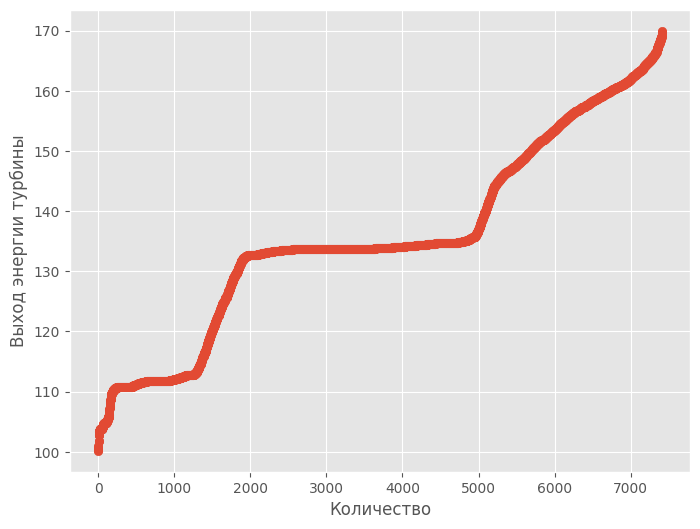

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.TEY.values))
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Выход энергии турбины', fontsize=12)
plt.show()

In [12]:
print(df.describe())

                AT           AP           AH         AFDP         GTEP  \
count  7411.000000  7411.000000  7411.000000  7411.000000  7411.000000   
mean     17.112261  1014.167883    79.174989     4.090755    25.663721   
std       7.428307     6.293003    13.465898     0.661865     4.325835   
min       2.116300   995.790000    34.493000     2.758400    17.878000   
25%      10.992000  1009.800000    70.428500     3.644750    23.364500   
50%      16.366000  1013.600000    82.129000     4.026300    24.770000   
75%      23.344500  1018.100000    89.778000     4.480350    29.879500   
max      34.532000  1034.200000   100.170000     7.318900    36.003000   

               TIT          TAT          TEY          CDP           CO  \
count  7411.000000  7411.000000  7411.000000  7411.000000  7411.000000   
mean   1084.733909   544.503170   135.745675    12.207578     1.572486   
std      16.134972     8.288471    16.209187     1.146561     1.845442   
min    1000.800000   512.450000   100

In [16]:
# заменяем данные в столбце
TEY= df['TEY']
TEY=TEY.replace(0, np.NaN)

In [17]:
#заменяем данные во всем наборе
cols = df.columns[:8] # выбираем только входные столбцы
df_new = df[cols].replace(0, np.NaN)
df_new['AP']=df['AP']
df_new

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67
...,...,...,...,...,...,...,...,...
7406,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61
7407,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78
7408,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19
7409,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74


In [18]:
# смотрим количество пропусков по каждой переменной
print(df_new.shape[0])
df_new.isnull().sum()*100/df_new.shape[0]

7411


AT      0.0
AP      0.0
AH      0.0
AFDP    0.0
GTEP    0.0
TIT     0.0
TAT     0.0
TEY     0.0
dtype: float64

In [19]:
# отбрасываем строки с большим количеством пропусков
df_del= df_new.dropna()
df_del

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67
...,...,...,...,...,...,...,...,...
7406,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61
7407,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78
7408,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19
7409,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74


In [21]:
cols_to_drop = ['TEY']
df_less_TEY = df_del.drop(cols_to_drop, axis=1)
df_less_TEY

,AT,AP,AH,AFDP,GTEP,TIT,TAT
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00
...,...,...,...,...,...,...,...
7406,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21
7407,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22
7408,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32
7409,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24


In [24]:
med = df_less_TEY['TIT'].median()
print(med)
df_less_TEY['TIT'] = df_less_TEY['TIT'].fillna(med)
df_less_TEY

1088.0


,AT,AP,AH,AFDP,GTEP,TIT,TAT
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00
...,...,...,...,...,...,...,...
7406,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21
7407,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22
7408,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32
7409,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24


In [25]:
from sklearn.impute import SimpleImputer
# Создаём объект класса SimpleImputer с параметрами:
# - помечаем пропуски, как np.nan
# - указываем арифметическое среднее в качестве стратегии заполнения
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Настраиваем алгоритм обучения
imputer = imputer.fit(df_new)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imputer.transform(df_new.loc[:,:]), columns = df_new.columns)

df_new1.round(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY
0,4.59,1018.7,83.68,3.58,23.98,1086.2,549.83,134.67
1,4.29,1018.3,84.24,3.57,23.95,1086.1,550.05,134.67
2,3.90,1018.4,84.86,3.58,23.99,1086.5,550.19,135.10
3,3.74,1018.3,85.43,3.58,23.91,1086.5,550.17,135.03
4,3.75,1017.8,85.18,3.58,23.92,1085.9,550.00,134.67
...,...,...,...,...,...,...,...,...
7406,9.03,1005.6,98.46,3.54,19.16,1049.7,546.21,111.61
7407,7.89,1005.9,99.09,3.51,19.41,1046.3,543.22,111.78
7408,7.26,1006.3,99.50,3.48,19.53,1037.7,537.32,110.19
7409,7.01,1006.8,99.01,3.45,19.38,1043.2,541.24,110.74


In [26]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
# Настраиваем алгоритм обучения
imp = imp.fit(df_new)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imp.transform(df_new.loc[:,:]), columns = df_new.columns)

df_new1.round(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY
0,4.59,1018.7,83.68,3.58,23.98,1086.2,549.83,134.67
1,4.29,1018.3,84.24,3.57,23.95,1086.1,550.05,134.67
2,3.90,1018.4,84.86,3.58,23.99,1086.5,550.19,135.10
3,3.74,1018.3,85.43,3.58,23.91,1086.5,550.17,135.03
4,3.75,1017.8,85.18,3.58,23.92,1085.9,550.00,134.67
...,...,...,...,...,...,...,...,...
7406,9.03,1005.6,98.46,3.54,19.16,1049.7,546.21,111.61
7407,7.89,1005.9,99.09,3.51,19.41,1046.3,543.22,111.78
7408,7.26,1006.3,99.50,3.48,19.53,1037.7,537.32,110.19
7409,7.01,1006.8,99.01,3.45,19.38,1043.2,541.24,110.74


<Axes: >

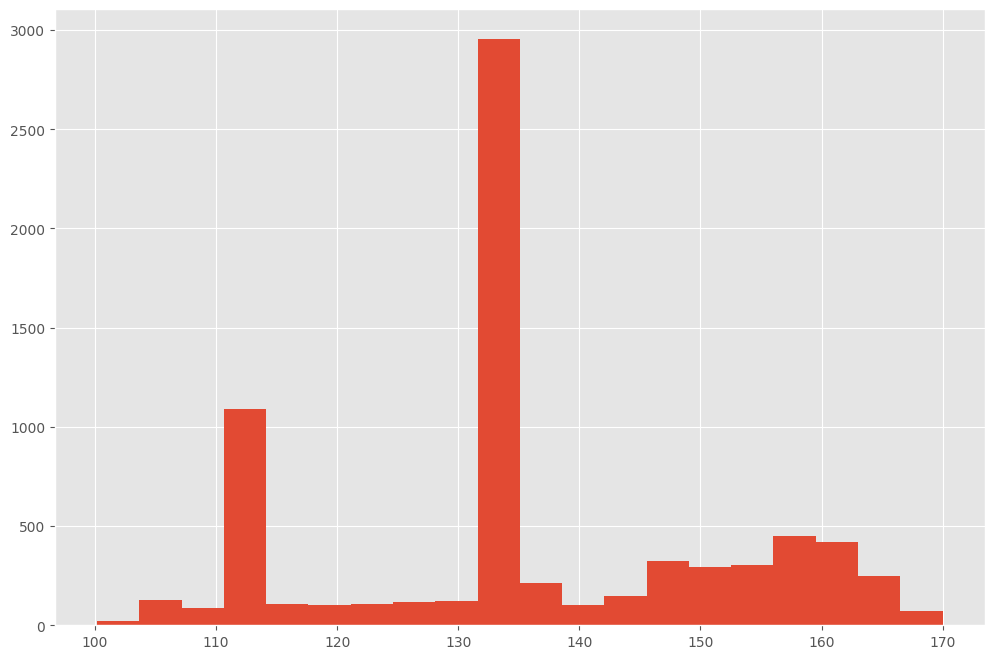

In [27]:
df_new1['TEY'].hist(bins=20)

<Axes: >

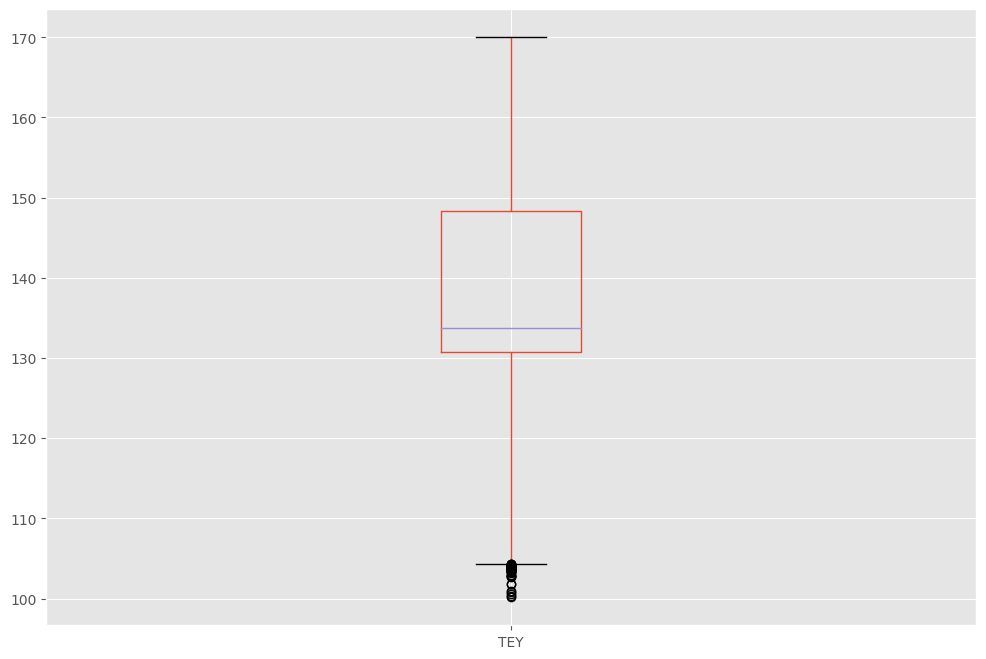

In [29]:
df_new1.boxplot(column=['TEY'])

In [30]:
df_new['TEY'].describe()

count    7411.000000
mean      135.745675
std        16.209187
min       100.170000
25%       130.745000
50%       133.810000
75%       148.325000
max       170.000000
Name: TEY, dtype: float64

In [32]:
df_new_del = df_new1.drop(np.where(df_new1['TEY'] <= 110)[0])

In [33]:
df_new_del['TEY'].describe()

count    7221.000000
mean      136.544396
std        15.640987
min       110.050000
25%       132.680000
50%       133.860000
75%       148.840000
max       170.000000
Name: TEY, dtype: float64

<Axes: >

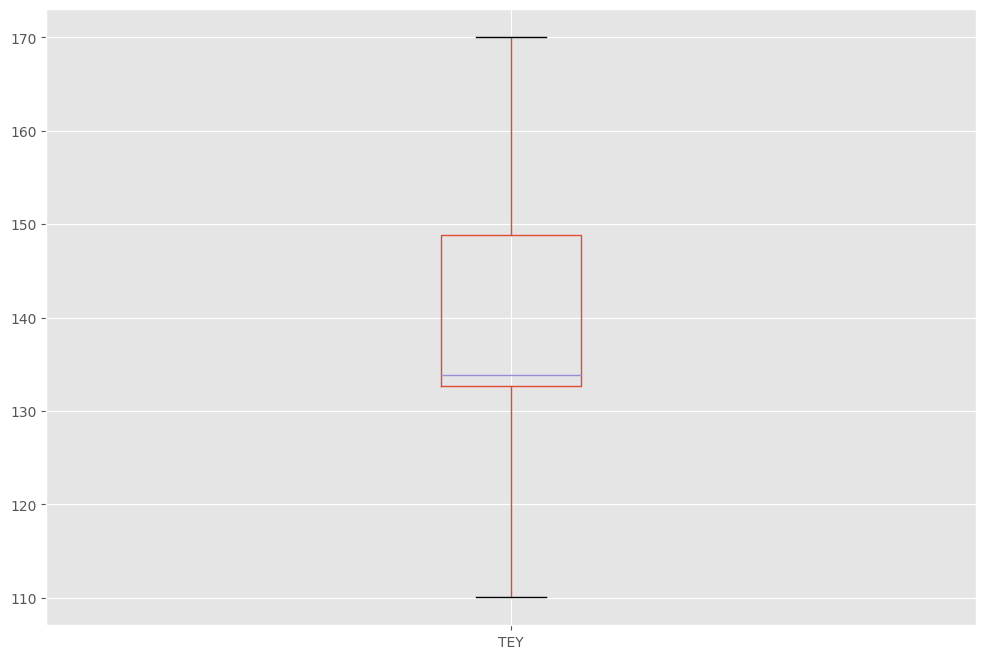

In [34]:
df_new_del.boxplot(column=['TEY'])

In [35]:
num_rows = len(df_new.index)
low_information_cols = []

for col in df_new.columns:
    cnts = df_new[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    print(top_pct*100)

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

0.05397382269599245
0.9310484415058696
0.2698691134799622
0.08096073404398867
0.09445418971798678
5.694238294427203
1.835109971663743
1.4977735798137903
